In [5]:
# !pip3 install seaborn 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt

In [19]:
data_1_6_0322=pd.read_csv('/Users/nikaveroha/Desktop/диплом печеночный/data/client id (data mining) 1-6 марта.csv',  dtype={'Время суток':str, 'Минута':str, 'Client ID (Cust. Dim. 2 - S)':str})
data_7_13_0322=pd.read_csv('/Users/nikaveroha/Desktop/диплом печеночный/data/client id (data mining) 7-13 м.csv',  dtype={'Время суток':str, 'Минута':str, 'Client ID (Cust. Dim. 2 - S)':str})
data_14_20_0322=pd.read_csv('/Users/nikaveroha/Desktop/диплом печеночный/data/client id (data mining) 14-20 м.csv',  dtype={'Время суток':str, 'Минута':str, 'Client ID (Cust. Dim. 2 - S)':str})
data_21_31_0322=pd.read_csv('/Users/nikaveroha/Desktop/диплом печеночный/data/client id (data mining) 21-31 м.csv',  dtype={'Время суток':str, 'Минута':str, 'Client ID (Cust. Dim. 2 - S)':str})

In [20]:
# соединение данных
data = pd.concat([data_1_6_0322, data_7_13_0322, data_14_20_0322, data_21_31_0322],ignore_index=True)

In [21]:
# исходные данные за период март 2022 года
data.head(11)

,Client ID (Cust. Dim. 2 - S),Категория событий,Действие по событию,Время суток,Минута,Пользователи
0,1000002170.1646539984,Internal Marketing,Promotion Impression,2022030607,13,1
1,1000002170.1646539984,Product List,Hub_Category_2017 | M04 - Product Thumbnails |...,2022030607,13,1
2,1000002170.1646539984,Product List,Hub_Category_2017 | M04 - Product Thumbnails |...,2022030607,13,1
3,1000010595.1646255367,Internal Marketing,Promotion Click,2022030300,09,1
4,1000010595.1646255367,Internal Marketing,Promotion Click,2022030300,10,1
5,1000010595.1646255367,Internal Marketing,Promotion Impression,2022030300,09,1
6,1000010595.1646255367,Internal Marketing,Promotion Impression,2022030300,10,1
7,1000010595.1646255367,Internal Marketing,Promotion Impression,2022030300,11,1
8,1000010595.1646255367,Product List,Category | Product Thumbnails | Подарки Clicks,2022030300,12,1
9,1000010595.1646255367,Product List,Category | Product Thumbnails | Подарки impres...,2022030300,12,1


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2928472 entries, 0 to 2928471
Data columns (total 6 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Client ID (Cust. Dim. 2 - S)  object
 1   Категория событий             object
 2   Действие по событию           object
 3   Время суток                   object
 4   Минута                        object
 5   Пользователи                  int64 
dtypes: int64(1), object(5)
memory usage: 134.1+ MB


In [23]:
# преобразование даты
data['Дата']=data['Время суток']+data['Минута']
data["Дата"] = pd.to_datetime(data["Дата"])

In [24]:
# вывод уникальных значений категорий событий
data["Категория событий"].unique()

array(['Internal Marketing', 'Product List', 'Cart', 'Account',
       'Checkout', 'Search', 'Store Locator', 'Product', 'Video',
       'Contact', 'Franchise'], dtype=object)

In [25]:
# вывод уникальных значений действий
print("Internal Marketing:", data['Действие по событию'].loc[data['Категория событий']== 'Internal Marketing'].unique())
print("Product List:", data['Действие по событию'].loc[data['Категория событий']== 'Product List'].unique())
print("Cart:",data['Действие по событию'].loc[data['Категория событий']== 'Cart'].unique())
print("Account:",data['Действие по событию'].loc[data['Категория событий']== 'Account'].unique())
print("Checkout:",data['Действие по событию'].loc[data['Категория событий']== 'Checkout'].unique())
print("Search:",data['Действие по событию'].loc[data['Категория событий']== 'Search'].unique())
print("Store Locator:",data['Действие по событию'].loc[data['Категория событий']== 'Store Locator'].unique())
print("Product:",data['Действие по событию'].loc[data['Категория событий']== 'Product'].unique())
print("Video:",data['Действие по событию'].loc[data['Категория событий']== 'Video'].unique())
print("Contact:",data['Действие по событию'].loc[data['Категория событий']== 'Contact'].unique())
print("Franchise:",data['Действие по событию'].loc[data['Категория событий']== 'Franchise'].unique())

Internal Marketing: ['Promotion Impression' 'Promotion Click']
Product List: ['Hub_Category_2017 | M04 - Product Thumbnails | Рекомендуемые продукты impressions'
 'Hub_Category_2017 | M04 - Product Thumbnails | Рекомендуемые продукты View'
 'Category | Product Thumbnails | Подарки Clicks' ...
 'Search | Product Thumbnails | результат поиска лосьон для рук Clicks'
 'Category | Product Thumbnails | Make up Clicks'
 'Search | Product Thumbnails | результат поиска карите 25% Clicks']
Cart: ['Add To Cart' 'Remove from cart' 'Click on Checkout AB test' 'Empty Cart']
Account: ['Login' 'Creation' 'Skincare Diagnostic Completed'
 'Beauty Profile Completed' 'Click on Login/Signup']
Checkout: ['Delivery Options' 'Payment Methods' 'Purchase' 'undefined' 'Step'
 'Creation']
Search: ['filter' 'Filter' 'Sort']
Store Locator: ['Boutique Click' 'Filter' 'Change Tab']
Product: ['Review Button Click' 'Add to Wishlist' 'Clicks on Pictures'
 'Click on БЕСТСЕЛЛЕРЫ tab' 'Click on ПОДАРКИ tab'
 'Click on ПРИМ

In [26]:
# значение числа пользователей
data["Пользователи"].nunique()

1

              category    count
0         Product List  2076868
1   Internal Marketing   599294
2                 Cart   114443
3             Checkout    49776
4              Product    34893
5               Search    33879
6              Account    15523
7        Store Locator     3092
8                Video      349
9              Contact      329
10           Franchise       26


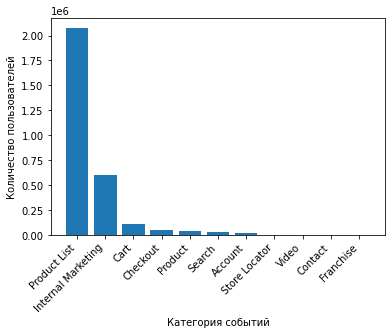

In [27]:
# частота происходящих событий среди пользователейй
data["Категория событий"].value_counts()
data_category=pd.DataFrame(data["Категория событий"].value_counts().reset_index().values,  columns=["category", "count"])
print(data_category)
plt.bar(data_category["category"], data_category["count"])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Категория событий")
plt.ylabel("Количество пользователей")
plt.show()

In [28]:
# количество уникальных совпадений в data["Client ID (Cust. Dim. 2 - S)"]
data["Client ID (Cust. Dim. 2 - S)"].nunique()

196757

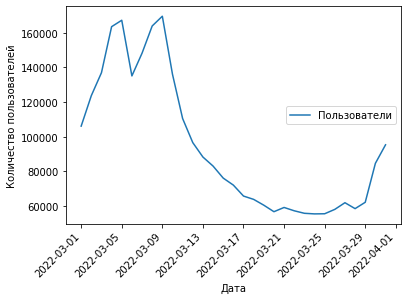

In [30]:
#  распределение пользователей по дням
day=pd.Grouper(key="Дата", freq="D")
data_day=data.groupby([day])\
                .sum().reset_index()

plt.plot(data_day["Дата"], data_day["Пользователи"], label = 'Пользователи')
plt.xticks(rotation=45, ha='right')
plt.legend(loc=5)
plt.xlabel("Дата")
plt.ylabel("Количество пользователей")
plt.show()

In [ ]:
# разбиение на более общие группы
data['Действие по событию'].loc[data['Категория событий']== 'Product List'] = 'View'

data['Действие по событию'].loc[((data['Категория событий']== 'Product') 
                                 & (data['Действие по событию']!= 'Review Button Click')
                                 & (data['Действие по событию']!= 'Add to Wishlist')
                                 & (data['Действие по событию']!= 'Clicks on Pictures')
                                 & (data['Действие по событию']!= 'Review Submitted'))
                               ] = 'Clicks on the card'